In [32]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import imblearn

from utils import get_dfs_full_resp

TREATMENT = "hcomp.txx.prop"

export_folder = f"../data/output/diagrams/{TREATMENT}"
os.makedirs(export_folder, exist_ok=True)

dfs = {}
dfs_full = {}

result_df = pd.DataFrame(index=range(105))
index=["Proposer", "Proposer + DSS"]
stats = pd.DataFrame(index=index)

#TREATMENTS = {"t00", "t10a", "t10b", "t11a", "t11b", "t11c"}
TREATMENTS_MAPPING = {
    "t00": "T0.P",
    "t10a": "TAI.Pu",
    "t10b": "TAI.Pn",
    "t11a": "TXAI.Pu",
    "t11b": "TXAI.Pi",
    "t11c": "TXAI.Pua",
    
}
TREATMENTS = TREATMENTS_MAPPING.values()

for treatment, new_treatment in TREATMENTS_MAPPING.items():

    # Read and sanitize the data
    df = pd.read_csv(f"../data/{treatment}/export/result__{treatment}_prop.csv")
    df_full = df.copy()
    # drop_cols = ["worker_id", "resp_worker_id", "prop_worker_id", "updated", "status", "job_id", "status", "timestamp", "rowid", "offer_dss", "offer", "offer_final", "completion_code"]
    drop_cols = ["worker_id", "resp_worker_id", "prop_worker_id", "updated", "status", "job_id", "status", "timestamp", "rowid", "offer_dss", "offer", "offer_final", "completion_code", "prop_time_spent"]
    df = df[[col for col in df.columns if col not in drop_cols]]
    
    treatment = new_treatment
    dfs[treatment] = df
    dfs_full[treatment] = df_full
    result_df[treatment+"."+"offer"] = df_full["offer"]
    result_df[treatment+"."+"offer_final"] = df_full["offer_final"]
    stats[treatment.upper()] = [df_full["offer"].mean(), df_full["offer_final"].mean()]
    

cols = [col for col in df.columns if col != "min_offer"] + ["min_offer"]

dfs_full_resp = get_dfs_full_resp()

In [27]:
result_df.describe()

,T0.P.offer,T0.P.offer_final,TAI.Pu.offer,TAI.Pu.offer_final,TAI.Pn.offer,TAI.Pn.offer_final,TXAI.Pu.offer,TXAI.Pu.offer_final,TXAI.Pi.offer,TXAI.Pi.offer_final,TXAI.Pua.offer,TXAI.Pua.offer_final
count,103.000000,103.000000,105.000000,105.000000,105.000000,105.000000,103.000000,103.000000,105.000000,105.000000,102.000000,102.000000
mean,43.592233,43.592233,41.476190,45.666667,44.714286,49.380952,46.990291,48.155340,46.666667,49.285714,44.558824,46.470588
std,14.974119,14.974119,15.315964,14.495800,16.782382,14.588840,13.920992,13.320894,17.929706,14.081298,19.180009,17.371711
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,40.000000,40.000000,35.000000,50.000000,40.000000,50.000000,45.000000,50.000000,40.000000,50.000000,40.000000,40.000000
50%,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
75%,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
max,100.000000,100.000000,80.000000,90.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


\begin{tabular}{lrrrrrr}
\toprule
{} &       T0.P &     TAI.PU &     TAI.PN &    TXAI.PU &    TXAI.PI &   TXAI.PUA \\
\midrule
Proposer       &  43.592233 &  41.476190 &  44.714286 &  46.990291 &  46.666667 &  44.558824 \\
Proposer + DSS &  43.592233 &  45.666667 &  49.380952 &  48.155340 &  49.285714 &  46.470588 \\
\bottomrule
\end{tabular}



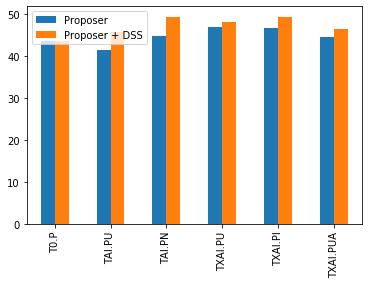

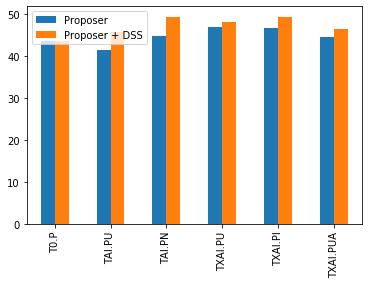

In [28]:
# sns.set()
stats.T.plot.bar()

    
#tmp_stats = stats[["T0.P", "TAI.Pu", "TAI.Pn", "TXAI.Pu", "TXAI.Pi", "TXAI.Pua"]]
tmp_stats = stats
tmp_stats.T.plot.bar()

100*(tmp_stats.iloc[1] - tmp_stats.iloc[0]) / tmp_stats.iloc[0]

# sns.barplot(y=index, data=stats.T)
print(tmp_stats.to_latex())

**Correlation to the target value**

**Responder's min_offer / Proposer's over and final_offer distribution**

../data/output/diagrams/hcomp.txx.prop


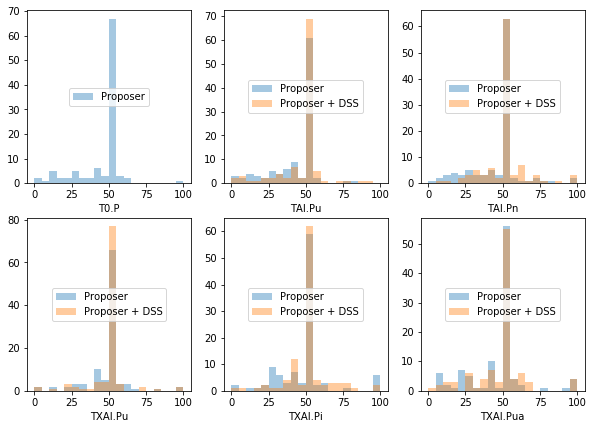

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

<Figure size 360x288 with 0 Axes>

In [29]:

bins = list(range(0, 105, 5))

idx = 0

f, axes = plt.subplots(2, 3, figsize=(10, 7))

for treatment in TREATMENTS:
    df = dfs_full[treatment]
    fig = plt.figure(figsize=(5, 4))
    ax = sns.distplot(df["offer"], hist=True, kde=False, bins=bins, ax=axes[idx//3, idx%3],  axlabel=treatment, label="Proposer")
    _ = ax.legend()
    if treatment.upper() != "T0.P":
        ax = sns.distplot(df["offer_final"], hist=True, kde=False, bins=bins, ax=axes[idx//3, idx%3],  axlabel=treatment, label="Proposer + DSS")
    _ = ax.legend(loc="center")
    
    idx += 1

plt.tight_layout()
f.savefig(os.path.join(export_folder, "offers.pdf"), bbox_inches='tight')

print(export_folder)

In [5]:
np.histogram(df.offer)

(array([ 8,  8,  6, 11, 57,  6,  0,  1,  1,  4]),
 array([  5. ,  14.5,  24. ,  33.5,  43. ,  52.5,  62. ,  71.5,  81. ,
         90.5, 100. ]))

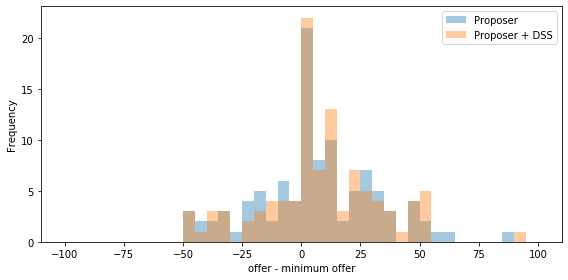

In [6]:
bins = list(range(-100, 105, 5))

plt.figure(figsize=(8,4))
offer_min_offer_diff = df_full["offer"] - df_full["min_offer"]
ax = sns.distplot(offer_min_offer_diff, hist=True, kde=False, axlabel="offer - minimum offer", bins=bins, label="Proposer")
_ = ax.set_ylabel("Frequency")


offer_min_offer_diff = df_full["offer_final"] - df_full["min_offer"]
ax = sns.distplot(offer_min_offer_diff, hist=True, kde=False, axlabel="offer - minimum offer", bins=bins, label="Proposer + DSS", ax=ax)
plt.legend()
plt.tight_layout()
ax.figure.savefig(os.path.join(export_folder, "offer-min_offer.pdf"))

In [36]:
from core.models.metrics import cross_compute, avg_gain_ratio, gain_mean, rejection_ratio, loss_sum, MAX_GAIN

def get_infos(min_offer, offer, metrics=None, do_cross_compute=False):
    if metrics is None:
        metrics = [avg_gain_ratio, gain_mean, rejection_ratio, loss_sum]
    #df = pd.DataFrame()
    size1, size2 = len(min_offer), len(offer)
    if size1 != size2:
        print("WARNING: different shapes!!!", size1, size2)
        min_size = min(size1, size2)
        min_offer = min_offer[:min_size]
        offer = offer[:min_size]
    infos = dict()
    for idx, metric in enumerate(metrics):
        if do_cross_compute:
            infos[metric.__name__] = cross_compute(min_offer, offer, metric)
        else:
            infos[metric.__name__] = metric(min_offer, offer)

    return infos

**Proposer's performance**

In [71]:
#print(dfs['TAI.Pu'].columns)
#print(result_df)
df_infos = pd.DataFrame()
# Previous computation
#df_infos = df_infos.append(get_infos(result_df['t13a.min_offer'], result_df['t11a.offer']), ignore_index=True)
#df_infos = df_infos.append(get_infos(result_df['t13a.min_offer_final'], result_df['t11a.offer_final']), ignore_index=True)

df_infos = df_infos.append(get_infos(dfs_full_resp['TAI.R']['min_offer'], result_df['TAI.Pu.offer']), ignore_index=True)
df_infos = df_infos.append(get_infos(dfs_full_resp['TAI.R']['min_offer'], result_df['TAI.Pu.offer_final']), ignore_index=True)

#df_infos = df_infos.append(get_infos(df_full['min_offer'], [fixed_offer], do_cross_compute=True), ignore_index=True)

df_infos.index = ["TAI.Pu vs TAI.R", "TAI.Pu + DSS vs TAI.R"]

df_infos


,avg_gain_ratio,gain_mean,loss_sum,rejection_ratio
TAI.Pu vs TAI.R,0.575657,35.714286,2405.0,0.314286
TAI.Pu + DSS vs TAI.R,0.635742,39.142857,2045.0,0.228571


In [74]:
df_infos = pd.DataFrame()
# Previous computation
#df_infos = df_infos.append(get_infos(result_df['t13a.min_offer'], result_df['t11a.offer']), ignore_index=True)
#df_infos = df_infos.append(get_infos(result_df['t13a.min_offer_final'], result_df['t11a.offer_final']), ignore_index=True)

df_infos = df_infos.append(get_infos(dfs_full_resp['TXAI.R']['min_offer'], dfs_full['TXAI.Pu']['offer']), ignore_index=True)
df_infos = df_infos.append(get_infos(dfs_full_resp['TXAI.R']['min_offer'], dfs_full['TXAI.Pu']['offer_final']), ignore_index=True)


df_infos.index = ["TXAI.Pu vs TXAI.R", "TXAI.Pu + DSS vs TXAI.R"]

df_infos


,avg_gain_ratio,gain_mean,loss_sum,rejection_ratio
TXAI.Pu vs TXAI.R,0.683077,41.650485,2025.0,0.165049
TXAI.Pu + DSS vs TXAI.R,0.691837,41.844660,2005.0,0.145631


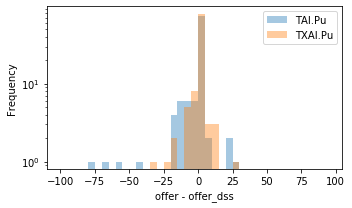

In [20]:

plt.figure(figsize=(5,3))
tmp = pd.DataFrame()
tmp["TAI.Pu#offer"] = result_df["TAI.Pu.offer"] - result_df["TAI.Pu.offer_final"]
tmp["TXAI.Pu#offer"] = result_df["TXAI.Pu.offer"] - result_df["TXAI.Pu.offer_final"]


bins = np.arange(-100, 100, 5)
ax = sns.distplot(tmp["TAI.Pu#offer"], hist=True, kde=False, axlabel="Responder minimum offer", bins=bins, label="TAI.Pu")
ax = sns.distplot(tmp["TXAI.Pu#offer"], hist=True, kde=False, axlabel="offer - offer_dss", bins=bins, label="TXAI.Pu")
ax.legend(loc='best')
_ = ax.set_ylabel("Frequency")
ax.set_yscale('log')
plt.tight_layout()


ax.figure.savefig(os.path.join(export_folder, "t10avst11adiff.pdf"))

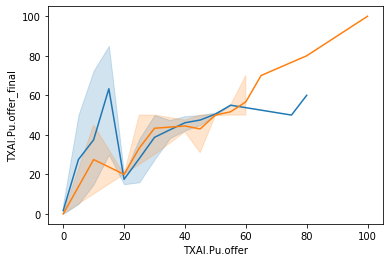

In [21]:
sns.lineplot(x="TAI.Pu.offer", y="TAI.Pu.offer_final", data=result_df)
sns.lineplot(x="TXAI.Pu.offer", y="TXAI.Pu.offer_final", data=result_df)

In [22]:
tmp.describe()

,TAI.Pu#offer,TXAI.Pu#offer
count,105.000000,103.000000
mean,-4.190476,-1.165049
std,13.956040,6.424672
min,-80.000000,-35.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,25.000000,25.000000


In [43]:
dfs_full_resp['TAI.R']['min_offer']

0       50
1       50
2       45
3      100
4       35
5       25
6       40
7       40
8       50
9       30
10      10
11      35
12      40
13      50
14      50
15      50
16      10
17      40
18      15
19      45
20      50
21      50
22      30
23      30
24      50
25      40
26      40
27      35
28       5
29      25
      ... 
75      20
76      10
77      25
78      20
79      30
80     100
81      50
82      60
83      30
84      50
85      50
86      10
87      50
88      50
89      50
90      25
91      40
92      40
93      50
94       5
95      40
96      40
97      50
98      40
99      50
100     50
101     25
102     55
103     50
104     50
Name: min_offer, Length: 105, dtype: int64